# 1. data cleansing and Descriptive Statistics

앞선 과정에서 병합한 데이터를 정제하고 기술 통계량을 확인한다.

목차:

1. 결측 탐지 및 처리
2. 데이터 정제
3. 기술 통계량 확인

In [1]:
import os
from datetime import datetime as dt

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
DATA_DIR = '../../data/diabetes-project/0.merge/'
store_dir = '../../data/diabetes-project/'

## 데이터 불러오기

In [3]:
df_data = pd.read_pickle(os.path.join(DATA_DIR, 'df_data_22-09-03.pkl')).reset_index()
print(df_data.shape)
df_data.head()

(29330, 6)


,index,date,time,code,value,pid
0,0,04-21-1991,9:09,58,100,01
1,1,04-21-1991,9:09,33,9,01
2,2,04-21-1991,9:09,34,13,01
3,3,04-21-1991,17:08,62,119,01
4,4,04-21-1991,17:08,33,7,01


data shape: (29330, 5)

## 데이터 기본 정보

In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29330 entries, 0 to 29329
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   29330 non-null  int64 
 1   date    29297 non-null  object
 2   time    29330 non-null  object
 3   code    29330 non-null  int64 
 4   value   29297 non-null  object
 5   pid     29330 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.3+ MB


date와 value에 결측이 있다는 것과, code를 제외하면 타입이 제멋대로 설정되어 있는 것을 알 수 있음.

### 결측 데이터 탐색 및 처리

<AxesSubplot:>

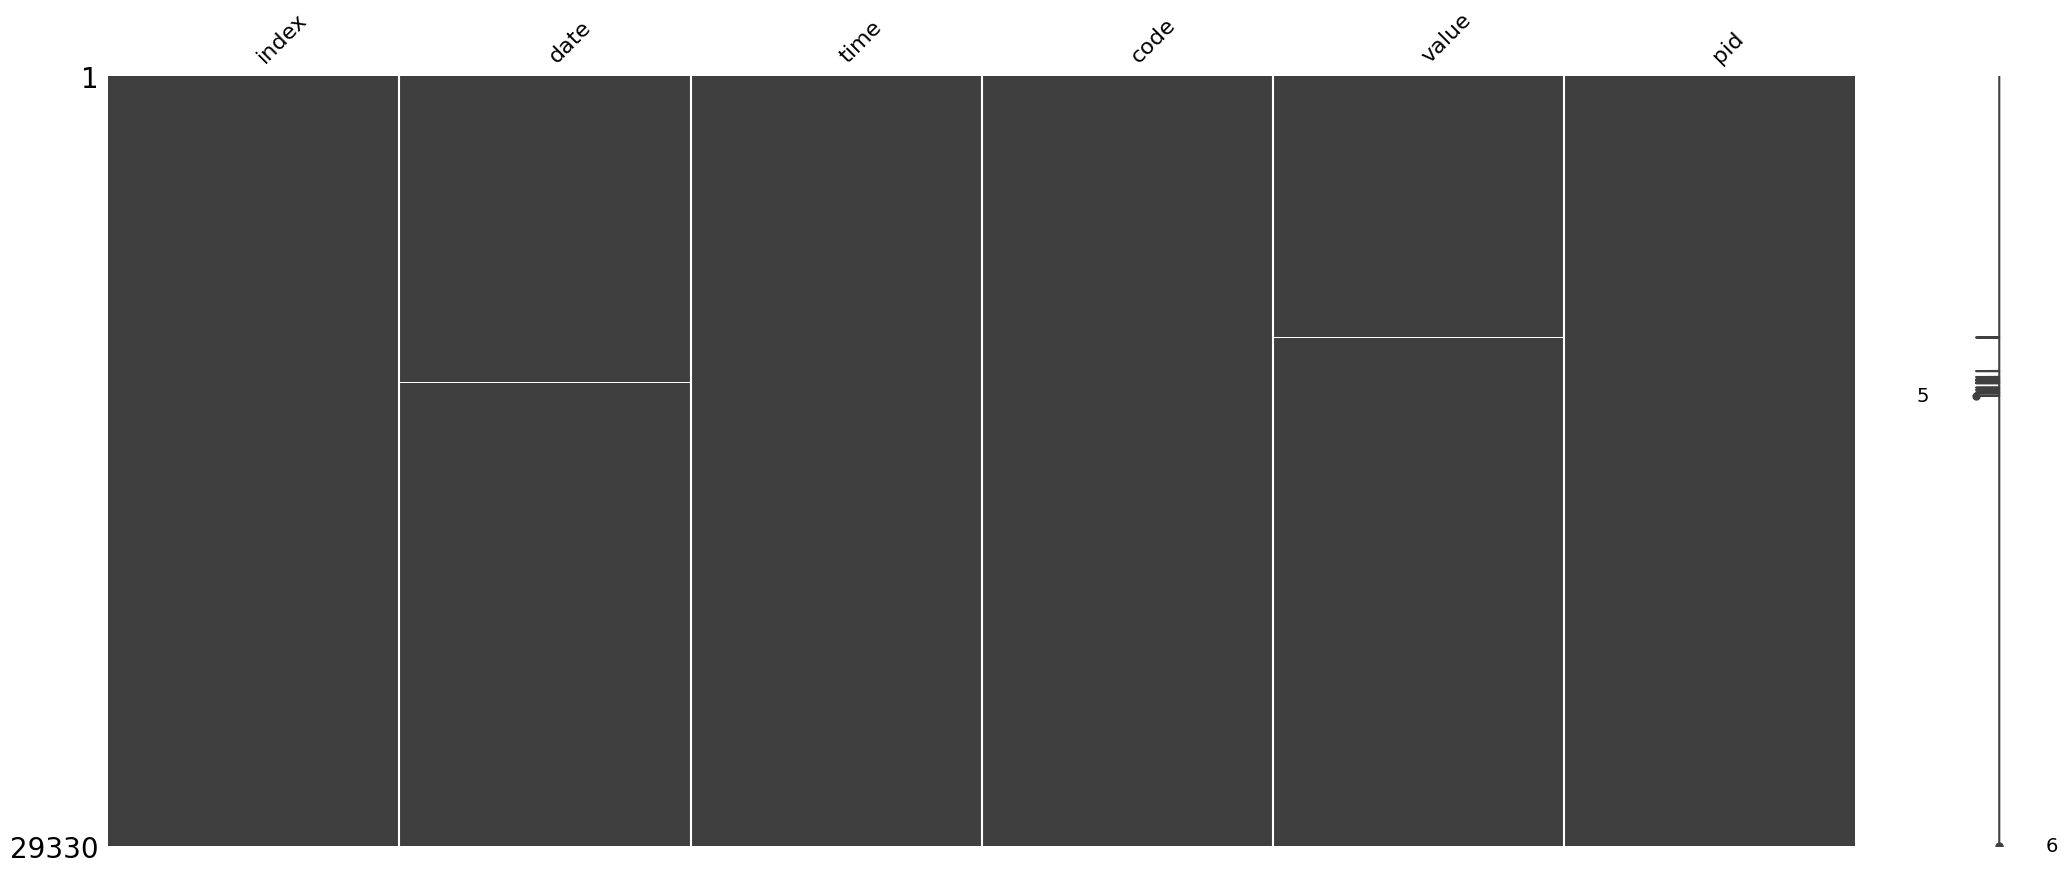

In [5]:
msno.matrix(df_data)

In [6]:
df_data[df_data.isnull().any(axis=1)].pid.value_counts()

29    60
27     6
Name: pid, dtype: int64

29번 환자와 27번 환자에서만 결측이 발생함

In [7]:
df_data[df_data.pid == '29']

,index,date,time,code,value,pid
11032,0,04-29-1990,7:00,58,136,29
11033,1,04-29-1990,7:00,33,007,29
11034,2,04-29-1990,7:00,34,018,29
11035,3,04-29-1990,14:00,60,062,29
11036,4,04-29-1990,14:00,33,004,29
...,...,...,...,...,...,...
12316,1284,12-16-1990,15:00,60,056,29
12317,1285,12-16-1990,15:00,33,005,29
12318,1286,12-16-1990,18:00,62,135,29
12319,1287,12-16-1990,18:00,33,006,29


In [8]:
df_data[(df_data.isnull().any(axis=1)) & (df_data.pid == '29')]

,index,date,time,code,value,pid
11239,207,05-25-1990,7:00,0,NaN,29
11240,208,NaN,201,33,3A,29
11241,209,05-25-1990,7:00,0,NaN,29
11242,210,NaN,004,33,21,29
11243,211,05-25-1990,7:00,0,NaN,29
11244,212,NaN,018,33,22,29
11465,433,07-02-1990,7:00,0,NaN,29
11466,434,NaN,202,33,3A,29
11467,435,07-02-1990,7:00,0,NaN,29
11468,436,NaN,006,33,21,29


In [9]:
df_data[(df_data.isnull().any(axis=1)) & (df_data.pid == '27')]

,index,date,time,code,value,pid
9960,805,10-12-1989,7:00,0,NaN,27
9961,806,NaN,138,33,3A,27
9962,807,10-12-1989,7:00,0,NaN,27
9963,808,NaN,006,33,21,27
9964,809,10-12-1989,7:00,0,NaN,27
9965,810,NaN,016,33,22,27


value가 결측인 레코드와, date가 결측인 레코드가 1:1 매핑이 가능한 것으로 보이나, 우선 제거하고 정상적인 데이터의 분포를 확인한 뒤에 대치하자

In [10]:
df_data = df_data.dropna(how='any')
df_data.shape

(29264, 6)

## 컬럼 별 데이터 정제 및 형변환

### date

날짜 컬럼의 경우, datetime으로 변환한 뒤 시간에 따른 추이를 확인하려 함.

In [11]:
for i, x in enumerate(df_data['date'].values):
    try:
        dt.strptime(x, '%m-%d-%Y')
    except:
        print(i, x)

6505 06-31-1991
6506 06-31-1991
6507 06-31-1991
6508 06-31-1991
6509 06-31-1991
6510 06-31-1991
6511 06-31-1991


일부 컬럼에서 예외가 발생하였음. 어떤 컬럼인지 확인해보자

In [12]:
df_data.iloc[6505:6512, 1]

6505    06-31-1991
6506    06-31-1991
6507    06-31-1991
6508    06-31-1991
6509    06-31-1991
6510    06-31-1991
6511    06-31-1991
Name: date, dtype: object

1991년도 6월 31일이 실존하는 날짜가 아니라서 datetime으로 변경 시 오류가 발생함. 이 데이터를 제거하자.

In [13]:
df_data = df_data[df_data['date'] != '06-31-1991']
print(df_data.shape)

(29257, 6)


29264 -> 29257로 shape이 감소함.

In [14]:
df_data['date'] = df_data['date'].apply(lambda x:dt.strptime(x, '%m-%d-%Y'))
df_data['date']

0       1991-04-21
1       1991-04-21
2       1991-04-21
3       1991-04-21
4       1991-04-21
           ...    
29325   1989-05-09
29326   1989-05-09
29327   1989-05-10
29328   1989-05-11
29329   1989-05-12
Name: date, Length: 29257, dtype: datetime64[ns]

위 데이터를 제거하여, 형변환을 정상적으로 수행함.

### time

시간 데이터의 경우에도, 통일된 형식의 datetime 형태로 변환하려 함

In [15]:
df_data['time'].head()

0     9:09
1     9:09
2     9:09
3    17:08
4    17:08
Name: time, dtype: object

In [16]:
for i, x in enumerate(df_data['time'].values):
    try:
        dt.strptime(x, '%H:%M')
    except:
        print(i, x)

27997 56:35
27998 56:35
27999 56:35
28098 188:00
28099 188:00


In [17]:
df_data.iloc[27997:28000,:]

,index,date,time,code,value,pid
28070,792,1991-04-09,56:35,58,237,67
28071,793,1991-04-09,56:35,33,16,67
28072,794,1991-04-09,56:35,34,40,67


In [18]:
df_data.iloc[28098:28100,:]

,index,date,time,code,value,pid
28171,893,1991-04-21,188:00,62,128,67
28172,894,1991-04-21,188:00,33,14,67


오류가 발생한 데이터를 보니, 시간으로 변환이 불가능한 데이터로, 위 5개의 레코드를 제거하는 것으로 함

In [19]:
df_data = df_data.drop(index=[28070, 28071, 28072, 28171, 28172], axis=0)
df_data.shape

(29252, 6)

In [20]:
df_data['time'] = df_data['time'].apply(lambda x:dt.strptime(x, '%H:%M')).dt.time
df_data['time']

0        09:09:00
1        09:09:00
2        09:09:00
3        17:08:00
4        17:08:00
           ...   
29325    08:00:00
29326    08:00:00
29327    08:00:00
29328    08:00:00
29329    08:00:00
Name: time, Length: 29252, dtype: object

시간 정보도 datetime(%H:%M:%S) 형태로 변환 완료.

### date + time

In [21]:
df_data['datetime'] = pd.to_datetime(df_data['date'].astype('str') + ' ' + df_data['time'].astype('str'))
df_data.head()

,index,date,time,code,value,pid,datetime
0,0,1991-04-21,09:09:00,58,100,01,1991-04-21 09:09:00
1,1,1991-04-21,09:09:00,33,9,01,1991-04-21 09:09:00
2,2,1991-04-21,09:09:00,34,13,01,1991-04-21 09:09:00
3,3,1991-04-21,17:08:00,62,119,01,1991-04-21 17:08:00
4,4,1991-04-21,17:08:00,33,7,01,1991-04-21 17:08:00


### code

In [22]:
%store -r code_dict

In [23]:
unknown_codes = []

for i, x in enumerate(df_data['code'].values):
    if x not in code_dict.keys():
        unknown_codes.append(x)
        
np.unique(unknown_codes, return_counts=True)

(array([ 4, 36, 56]), array([  1,   1, 119]))

In [25]:
df_data['code'] = df_data['code'].apply(lambda x:code_dict[x] if x in code_dict.keys() else x)

In [28]:
df_data['code'] = df_data['code'].replace(4, np.nan).replace(36, np.nan).replace(56, np.nan)

In [37]:
df_data['code'] = df_data['code'].astype('string').replace('nan', np.nan)
df_data['code']

0        Pre-breakfast blood glucose measurement
1                           Regular insulin dose
2                               NPH insulin dose
3           Pre-supper blood glucose measurement
4                           Regular insulin dose
                          ...                   
29325                       Regular insulin dose
29326                           NPH insulin dose
29327                           NPH insulin dose
29328                           NPH insulin dose
29329                           NPH insulin dose
Name: code, Length: 29252, dtype: string

### value

혈당 수치를 나타낸 것으로 float 형태를 가질 것으로 보임.

In [39]:
df_data = df_data.reset_index(drop=True)
df_data.head()

,index,date,time,code,value,pid,datetime
0,0,1991-04-21,09:09:00,Pre-breakfast blood glucose measurement,100,01,1991-04-21 09:09:00
1,1,1991-04-21,09:09:00,Regular insulin dose,9,01,1991-04-21 09:09:00
2,2,1991-04-21,09:09:00,NPH insulin dose,13,01,1991-04-21 09:09:00
3,3,1991-04-21,17:08:00,Pre-supper blood glucose measurement,119,01,1991-04-21 17:08:00
4,4,1991-04-21,17:08:00,Regular insulin dose,7,01,1991-04-21 17:08:00


In [40]:
index_list = []

for i, x in enumerate(df_data['value'].values):
    try:
        float(x)
    except:
        print(i, x)
        index_list.append(i)

1112 0Hi
1146 0Hi
1152 0Hi
1160 0Hi
1164 0Hi
1178 0Lo
1554 0Hi
16393 0''


In [41]:
df_data['value'].iloc[1112], df_data['value'].iloc[1146], \
df_data['value'].iloc[1152], df_data['value'].iloc[1160], \
df_data['value'].iloc[1164], df_data['value'].iloc[1178], \
df_data['value'].iloc[1554], df_data['value'].iloc[16393]

('0Hi', '0Hi', '0Hi', '0Hi', '0Hi', '0Lo', '0Hi', "0''")

다 숫자는 아닌 값으로 구성되어 있으며, 해석이 불가능하여 제거함

In [42]:
# index_list = []

# for i in [1112, 1146, 1152, 1160, 1164, 1178, 1554, 16393]:
#     index_list.append(df_data.iloc[i]['index'])

# print(index_list)

In [43]:
df_data = df_data.drop(index=index_list, axis=0)
df_data.shape

(29244, 7)

29252 -> 29244 로 8개의 레코드를 제거함.

In [44]:
df_data['value'] = df_data['value'].astype('float64')
df_data['value']

0        100.0
1          9.0
2         13.0
3        119.0
4          7.0
         ...  
29247      1.0
29248      7.0
29249      7.0
29250      7.0
29251      7.0
Name: value, Length: 29244, dtype: float64

### pid

In [45]:
df_data.pid = df_data.pid.astype('str')
df_data.pid

0        01
1        01
2        01
3        01
4        01
         ..
29247    70
29248    70
29249    70
29250    70
29251    70
Name: pid, Length: 29244, dtype: object

### 컬럼 type 확인

In [46]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29244 entries, 0 to 29251
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   index     29244 non-null  int64         
 1   date      29244 non-null  datetime64[ns]
 2   time      29244 non-null  object        
 3   code      29123 non-null  string        
 4   value     29244 non-null  float64       
 5   pid       29244 non-null  object        
 6   datetime  29244 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2), string(1)
memory usage: 1.8+ MB


# 기술 통계량 확인

In [47]:
df_data.columns

Index(['index', 'date', 'time', 'code', 'value', 'pid', 'datetime'], dtype='object')

In [48]:
numeric_cols = ['value']
categorical_cols = ['pid', 'code']
datetime_cols = ['date', 'time', 'datetime']

In [49]:
df_data[numeric_cols].describe()

,value
count,29244.000000
mean,79.416718
std,93.522136
min,0.000000
25%,6.000000
50%,24.000000
75%,142.000000
max,501.000000


 * value: 혈당 값인 것으로 보이는데, 0일 수 있는 값인지 확인이 필요함

In [50]:
df_data[categorical_cols].describe()

,pid,code
count,29244,29123
unique,70,19
top,55,Regular insulin dose
freq,1327,9480


 * pid: 55번 환자의 데이터가 1327개로 가장 많으며, 총 70명의 환자 정보가 존재함
 * code: Regular insulin dose가 가장 많은 비중을 차지, 19 종류 중 하나의 값을 가짐.

In [76]:
df_data[datetime_cols].describe(datetime_is_numeric=True, include='all')

,date,time,datetime
count,29244,29244,29244
unique,NaN,1186,NaN
top,NaN,08:00:00,NaN
freq,NaN,3196,NaN
mean,1990-08-19 02:10:44.070578560,NaN,1990-08-19 15:49:46.204349568
min,1988-03-27 00:00:00,NaN,1988-03-27 08:00:00
25%,1990-01-03 00:00:00,NaN,1990-01-03 07:00:00
50%,1990-09-20 00:00:00,NaN,1990-09-20 08:36:30
75%,1991-05-08 00:00:00,NaN,1991-05-08 07:16:30
max,1991-09-23 00:00:00,NaN,1991-09-23 21:10:00


 * date: date의 최소는 1988-03-27, 최대는 1991-09-23으로 약 3년에 걸쳐 수집된 데이터임을 알 수 있음.
 * time: 오전 8시에 측정된 데이터가 가장 많은 것을 알 수 있음. 환자별로 데이터 수집 주기가 다를 것으로 보임.

## 데이터의 분포를 시각적으로 확인해보자

### value

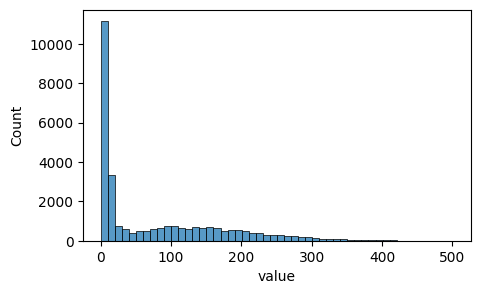

In [69]:
plt.figure(figsize=(5,3))
sns.histplot(data=df_data['value'], bins=50)
plt.show()

### code

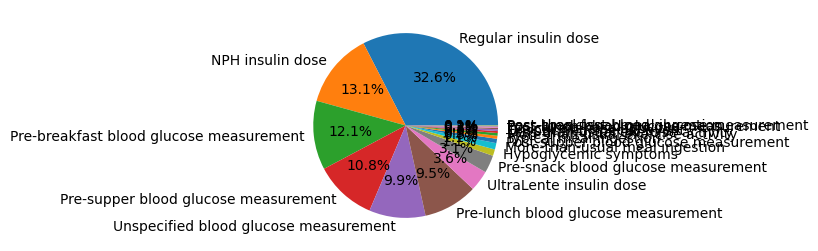

In [66]:
plt.figure(figsize=(5,3))
plt.pie(df_data['code'].value_counts(), labels=df_data['code'].value_counts().index, autopct='%.1f%%')
plt.show()

### pid

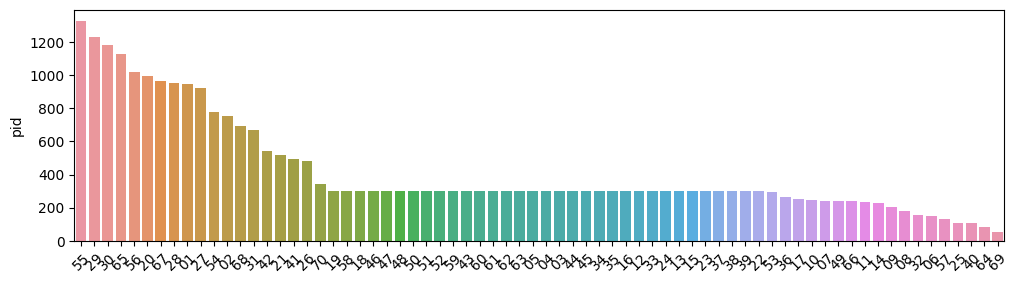

In [75]:
plt.figure(figsize=(12,3))
sns.barplot(x=df_data['pid'].value_counts().index, y=df_data['pid'].value_counts())
plt.xticks(rotation=45)
plt.show()

### datetime

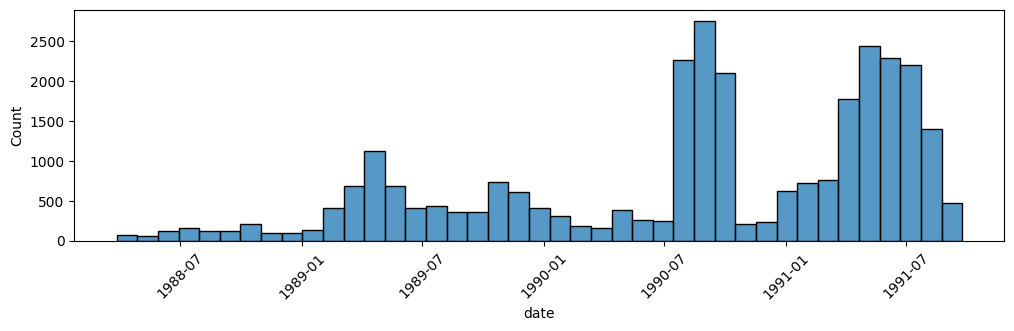

In [81]:
plt.figure(figsize=(12,3))
sns.histplot(df_data['date'])
plt.xticks(rotation=45)
plt.show()